# CHANDAN KUMAR
# ID: GO_STP_13267

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [4]:
df = pd.read_csv("/content/train.csv")
df.drop(labels="PassengerId", inplace=True, axis=1)
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

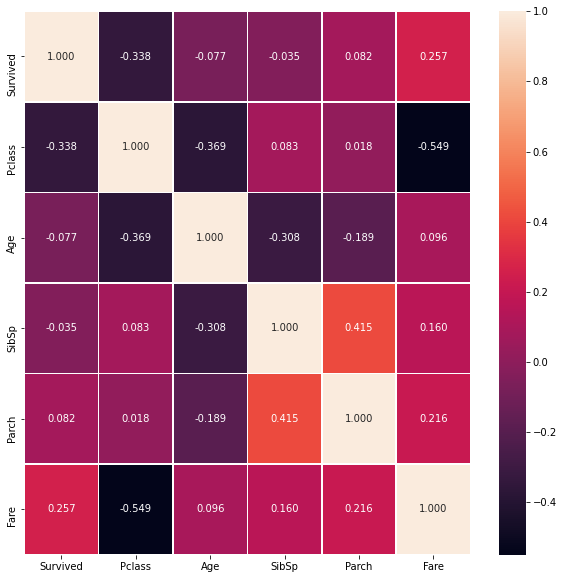

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

In [8]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

df["who"] = df[["Age", "Sex"]].apply(woman_child_or_man, axis=1)

wh = {'child':3,'woman':2, 'man':1}
df['who']=df.who.map(wh)

df["adult_male"] =(df.who == "man")
al={True: 1, False:0}
df["adult_male"]=df["adult_male"].map(al)
df["alone"] = ~(df.Parch + df.SibSp).astype(bool)
df["alone"]=df["alone"].map(al)
dk = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
df["deck"] = df.Cabin.str[0]
df['deck']=df.deck.map(dk)
df['deck']=df['deck'].fillna(0)

In [9]:
def process_family(parameters):
    x,y=parameters
    # introducing a new feature : the size of families (including the passenger)
    family_size = x+ y + 1
    if (family_size==1):
      return 1 # for singleton
    elif(2<= family_size <= 4 ):
      return 2 #for small family
    else:
      return 3 #for big family 

df['FAM_SIZE']= df[['Parch','SibSp']].apply(process_family, axis=1)

In [10]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    df['title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['title'] = df.title.map(Title_Dictionary)
    return df

df = get_titles()
titles_dummies = pd.get_dummies(df['title'], prefix='title')
df = pd.concat([df, titles_dummies], axis=1)
df.drop(['title'], axis=1, inplace=True)

In [11]:
df['Age'] = df['Age'].fillna(np.round(df['Age'].mean(), 0))
df["Embarked"].fillna("S", inplace = True)
df['Fare'] = np.round(df['Fare'], 2)
df.drop(["Cabin"],axis=1, inplace=True)

In [12]:
df.drop(['Name','Ticket'], axis=1, inplace=True)

In [13]:
df=pd.get_dummies(df)
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'who',
       'adult_male', 'alone', 'deck', 'FAM_SIZE', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_Officer', 'title_Royalty', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [14]:
df.isna().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
who              0
adult_male       0
alone            0
deck             0
FAM_SIZE         0
title_Master     0
title_Miss       0
title_Mr         0
title_Mrs        0
title_Officer    0
title_Royalty    0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [15]:
y = df['Survived']
X = df.drop(labels='Survived', axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X.shape

(891, 21)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
n, m = model.predict(X_test), y_test
print("Confusion matrix:\n",confusion_matrix(m, n))
print("Accuracy: ", accuracy_score(m, n) * 100, "%")
print("Precision: ", precision_score(m, n) * 100, "%")
print("Recall: ", recall_score(m, n))
print("F1: ", f1_score(m, n))

Confusion matrix:
 [[96 21]
 [10 52]]
Accuracy:  82.68156424581005 %
Precision:  71.23287671232876 %
Recall:  0.8387096774193549
F1:  0.7703703703703705
